# Home Credit Default Risk
We are going to predict how capable each applicant is of repaying a loan.


### Download the competion file
I use the API provided by the compeition to download the competition data; which is a zip file file.

In [3]:
!kaggle competitions download -c home-credit-default-risk

100%|████████████████████████████████████████| 688M/688M [02:03<00:00, 9.15MB/s]
100%|████████████████████████████████████████| 688M/688M [02:03<00:00, 5.86MB/s]


### Unzip the file 

In [35]:
import os
import zipfile

with zipfile.ZipFile("home-credit-default-risk.zip", 'r') as zip_ref:
    zip_ref.extractall('home_credit_data')

The data folder contain: 
* application_train and application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* bureau_balance: It's monthly data about the previous credit in bureau
* previous_application: previous applications for loans at Home credit of clients who have loans in the application data
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit.
* installments_payment: payment history for previous loans at Home Credit.
The competition page provide a diagramm that discribe ad shows how data is related

### Application train/test 
I will proceed first with the application data. Make EDA and modeling with available feature in the dataset before moving foward with others.
The application train/test dataset contain information about loan applicant at the application time. We have many feature in the datathat can be use to analyse clients capability or ability to repay loan. So we will proceed to a deep analysis with information at the time of application to predict whether the loan will be repay or not.

In [4]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
#import application train data
appli_train = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/application_train.csv")
appli_train.shape

(307511, 122)

The train dataset contain 307511 observations and 122 variables (features). Each row in the dataset correspond to a given loan. Since this is the train data the features include the target variable which is labelized as "Target". "Target" is the variable we want to predict. If target == 0, this implies that the loan has been repaid and target == 1 when the loan has not be repaid

In [23]:
appli_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let look at the 122 columns of the data. We can by this mean have an ideas of how we're going to lead the analysis and which of the feature could be relevant for the analysis and for EDA(Explanatory Data Analysis)

In [25]:
#get the columns
appli_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [38]:
#Columns types
appli_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [43]:
#import test data
appli_test = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/application_test.csv")
appli_test.shape

(48744, 121)

The test data contain 48744 observations which is more than the train data. There is 121 variables because the target variable is excluded since it's the one we would like to predict.

In [40]:
appli_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Number of unique classes in each object column
appli_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Exploratory Data Analysis
In this section I will calculate statistics and make figure to find trends, patterns and/or relationship beatween variables within the dataset. I aim here to get what our data can tell us.
Let's dive into the explanatory data analysis by :
* Examining the distribution of the target
* Looking for missing values
* Encoding categorical variable (way to deal with them since most of the categorial variables have small numberof unique variable)

In [73]:
appli_train["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

There is two modalities in the "target". 0 that indicate that the clients repaid its loan in time and 1 that indicate that the client had paiement difficulties. The first observation from the counts is that, most of the clients repaid the load in time. It's about 282686 clients that had not payment issues.
we can choose to have a proper look on that by ploting the distribution of loan with the target as following.

<Axes: ylabel='Frequency'>

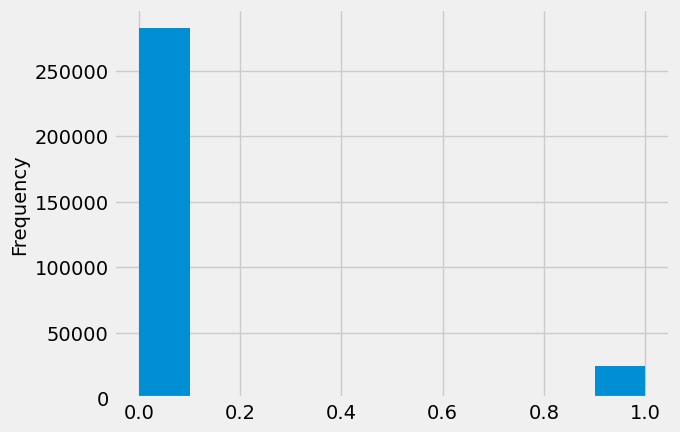

In [75]:
appli_train["TARGET"].plot.hist()

The histogram shows as we have mentionned, that there is an imbalanced class problem. We have more loan that has been repaid than loans that were not repaid. This is important to know because when we get into the modeling part, we can weight the classes by their representation in the data to reflect this imbalance.

#### Missing Values ??
We can loook for missing variables by going through each column to conty the missing variable. But it's more interesting to do it at once by defining a function that will count missing values within each column

In [44]:
# Function to calculate missing values by column 
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [46]:
# Missing values statistics
missing_values = missing_values_table(appli_train)
missing_values

The dataset has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


As we can see in the above table, there are 67 features out of the 122 that have missing values. some of them have morethan 50% of they data that are missing; We will probably drop them because more than 30% missing data it's a lot.

First of all, let's have a look on how data are distributed. Thiw will allow tp realise whether the data are unbalance , if outlier are in there etc.
Let's start with the target though

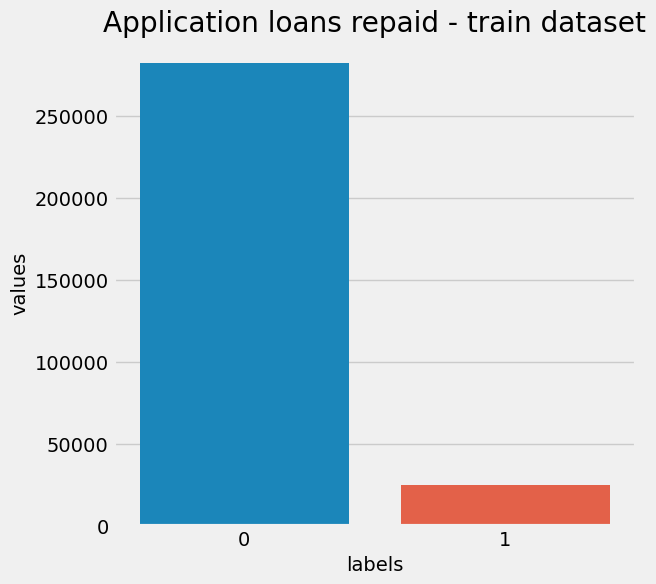

In [180]:
temp = appli_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repaid - train dataset')
sns.set_color_codes("colorblind")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Data in The target is unbalanced in term of proportion for each category (repayement or not, this is insigh that we are going to take into account when the modeling part comes. The pir plot below show it clearly in therm of proportion

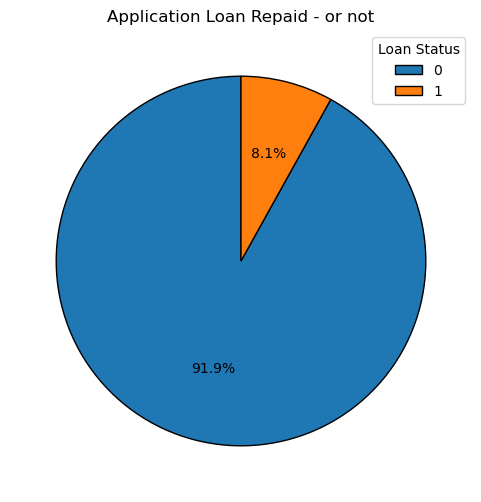

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (Replace with actual application_train DataFrame)
temp = appli_train["TARGET"].value_counts()

df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# pie chart plot
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(df['values'],autopct='%1.1f%%',
                    labels=None,  # Hides category labels
                    startangle=90,  # Optional: Rotates for better view
                    wedgeprops={'edgecolor': 'black'}  # Adds border for clarity
)
# Add legend using labels
plt.legend(df['labels'], title="Loan Status")  
#set the title
plt.title('Application Loan Repaid - or not')
plt.ylabel('')  # Remove default y-axis label for cleaner look
plt.show()


In [ ]:
def plot_stats(data,feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

While i was scrolling throughout the dataset, I realise that some of the columns  were negative. The columns :
* DAYS_BIRTH : Client's age in days at the time of application
* DAYS_EMPLOYED : How many days before the application the person started current employment
* DAYS_REGISTRATION : How many days before the application did client change his registration
* DAYS_ID_PUBLISH  : How many days before the application did client change the identity document with which he applied for the loan.
So I decided to lookout
we have negative values in the columns because the days of application is consider as date 0. So any day before the application date is consider Negative count. we can multiplie by _1 if we'd like to uise positive date ; and divided by 365 if we want them ion term of year.

DAYS_BIRTH; DAYS_REGISTRATION; DAYS_ID_PUBLISH look reasonnable because the maximum value is either 0 or a negative valur which make sens regarding the details we've just given; as weel as the means. But DAYS_EMPLOYED does not look normal because we have a positive means but also the maximum value is positive and near 1000 years which is not reasonnable.



In [89]:
appli_train[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [91]:
(appli_train['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### Distribution for the feature that might be relevant in the analysis
I defined a function to plot distribution for some of the feature from the data. As a start we are going to focus on features that could be relevant in the analysis based on their description

In [393]:
# Plot distribution of one feature
def distribution_plot(data,feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    
    # Remove the grid by setting the style to "white"
   # sns.set_style("white")  

    # Use sns.histplot instead of sns.distplot (which is deprecated)
    sns.distplot(data[feature].dropna(), color=color, kde=True, bins=100)

    # Remove x and y limits to prevent zoom issues
   # plt.xlim(auto=True)
    #plt.ylim(auto=True)
    plt.show()  

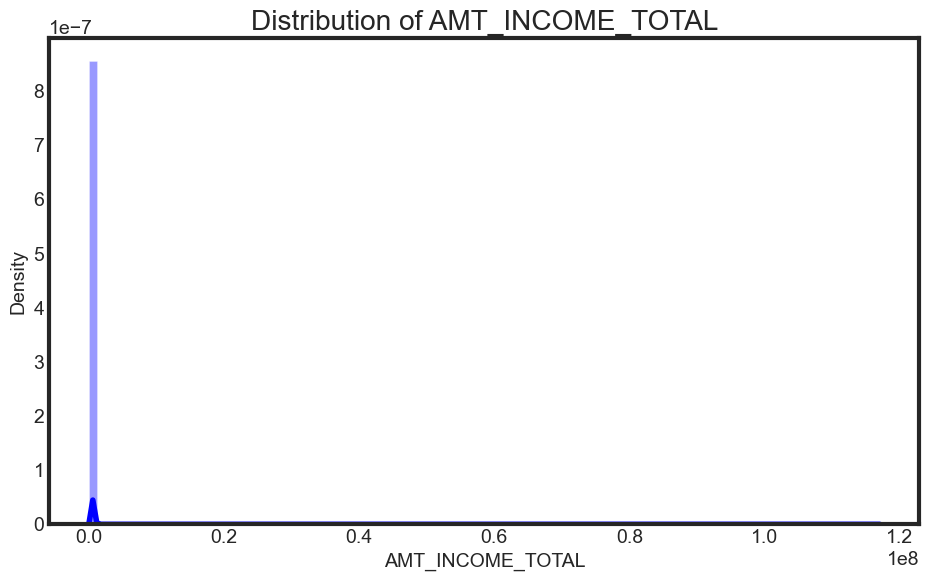

In [242]:
# Distribution for the clients total income
distribution_plot(appli_train, 'AMT_INCOME_TOTAL', 'blue')


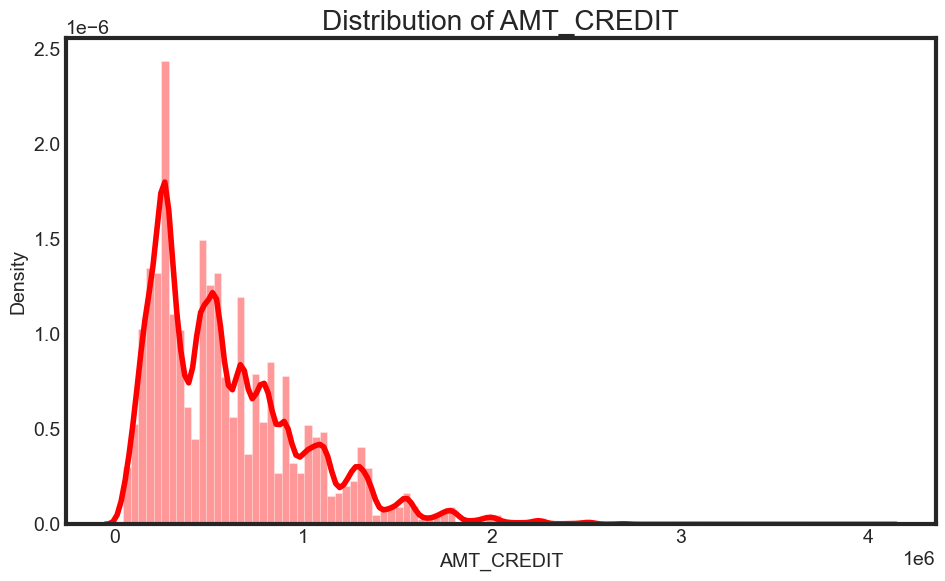

In [244]:
distribution_plot(appli_train, 'AMT_CREDIT', 'red')

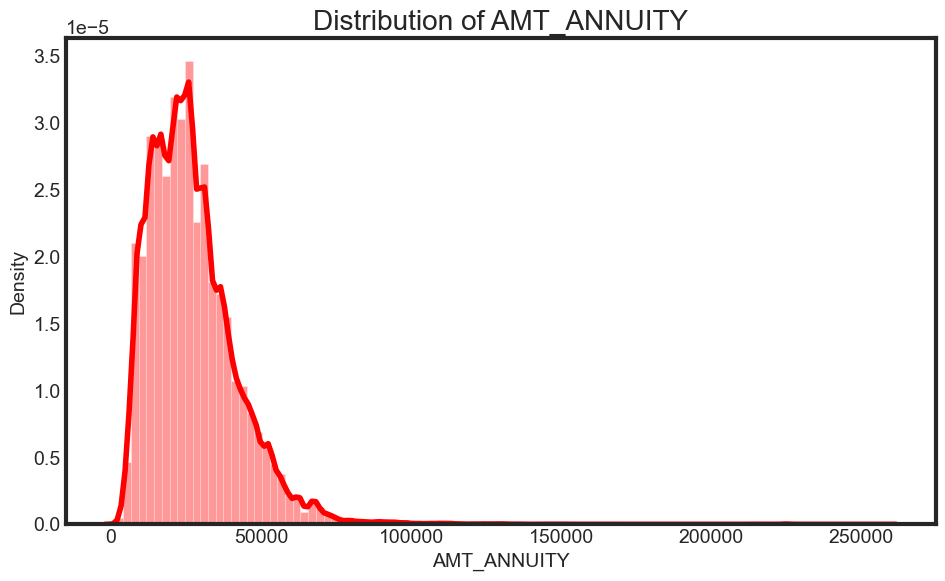

In [246]:
distribution_plot(appli_train, 'AMT_ANNUITY', 'red')

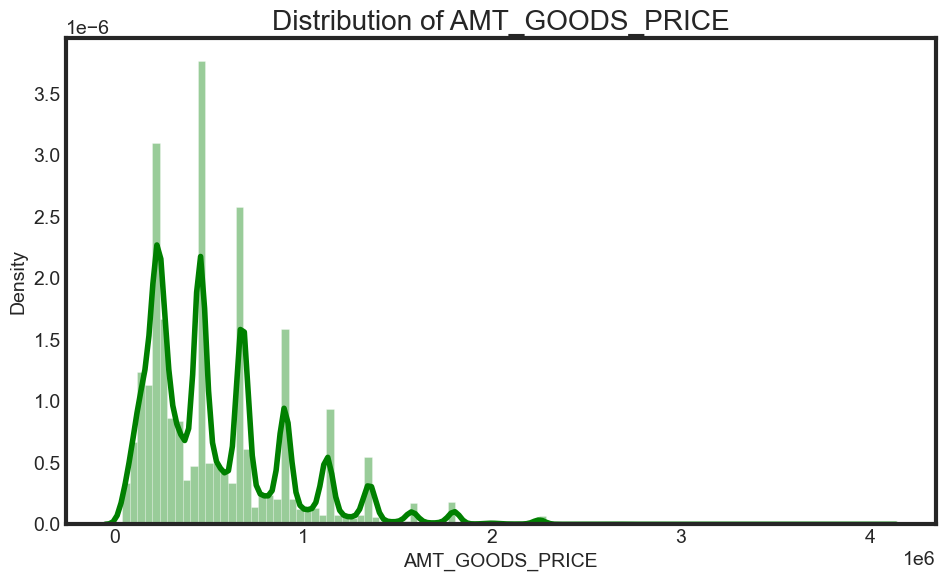

In [248]:
distribution_plot(appli_train, 'AMT_GOODS_PRICE', 'green')

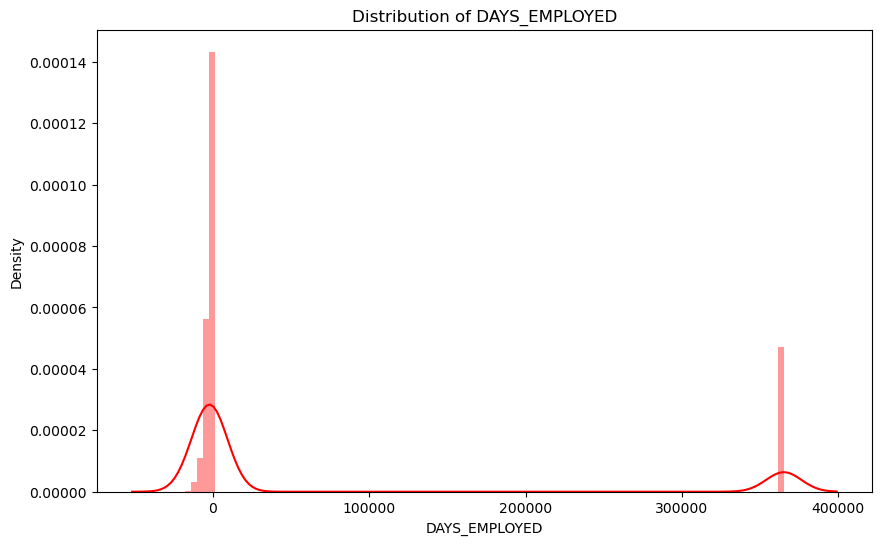

In [122]:
distribution_plot(appli_train, 'DAYS_EMPLOYED', 'red')

Text(0.5, 0, 'Days Birth')

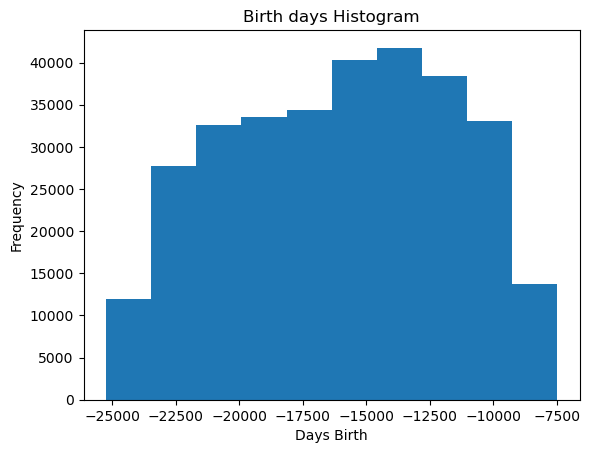

In [128]:
appli_train['DAYS_BIRTH'].plot.hist(title = 'Birth days Histogram');
plt.xlabel('Days Birth')

Text(0.5, 0, 'Days Employment')

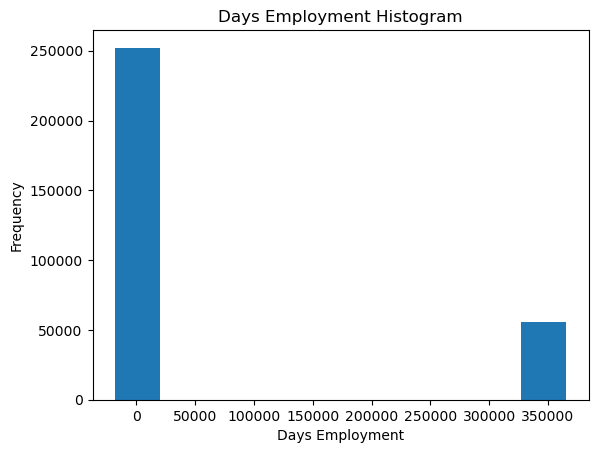

In [132]:
# Let's look at the distribution
appli_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

It looks like we are facing outliers. But its a little nit difficult to get precisely what's about. so we plot the distribution to have better look on the values. In my position I can not provided proper explanation on why we do have those values. This can be due to error or anything alse. As it does not make sense for us in term of the comprehension we have on the days values, I will replace them by missing value in order to keep logic in the dataset.

In [134]:
# Create an anomalous flag column
appli_train['DAYS_EMPLOYED_ANOM'] = appli_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
appli_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


Text(0.5, 0, 'Days Employment')

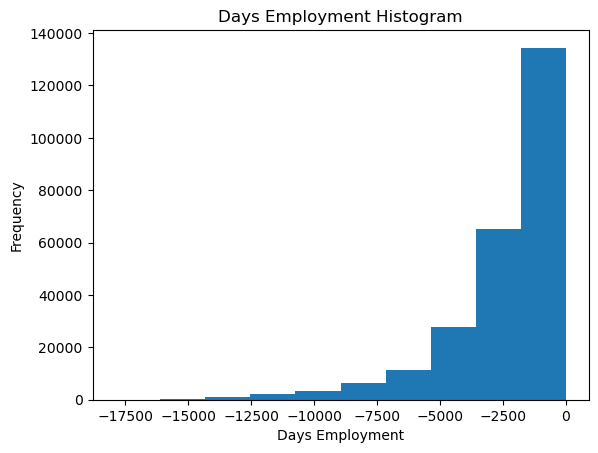

In [136]:
appli_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

As we can see, by turning the anomalous value into missing the column make sense. The values are Lower or equal to 0 as expected.

test_En['DAYS_EMPLOYED_ANOM'] = test_En["DAYS_EMPLOYED"] == 365243
test_En["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_En["DAYS_EMPLOYED_ANOM"].sum(), len(test_En)))

Text(0, 0.5, 'Count')

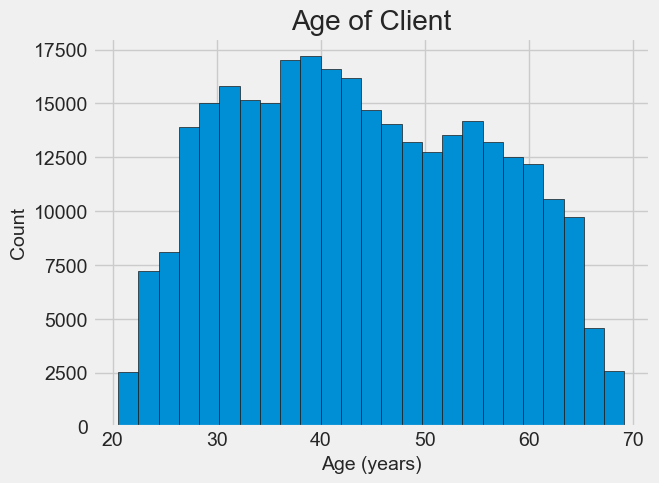

In [395]:
appli_train['DAYS_BIRTH'] = abs(appli_train['DAYS_BIRTH'])
#appli_train['DAYS_BIRTH'].corr(appli_train['TARGET'])


#plt.style.use('fivethirtyeight')# Set the style of plots

# Plot the distribution of ages in years
plt.hist(appli_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

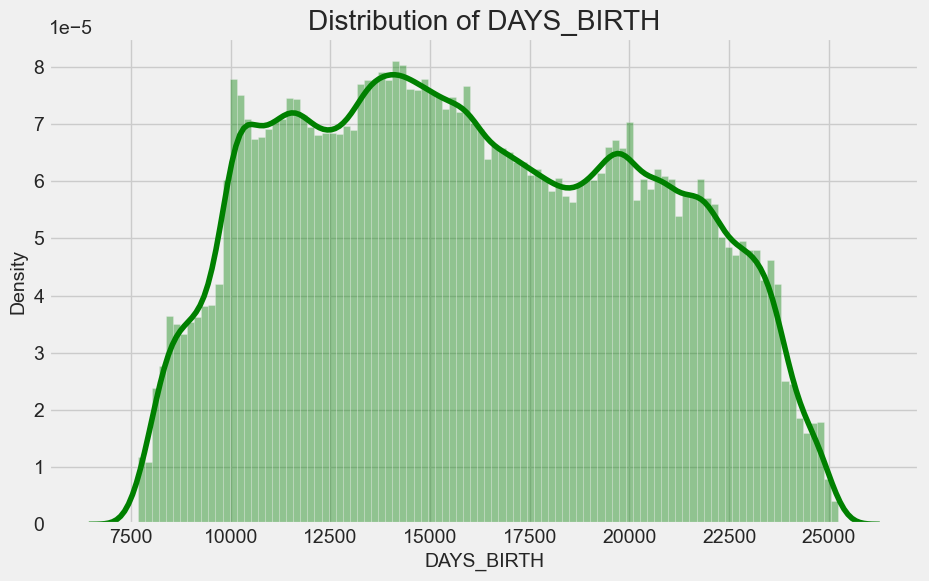

In [397]:
distribution_plot(appli_train, 'DAYS_BIRTH', 'green')

Let's have a look on the distribution that described for how long the client have been working before the application for the loan. "DAYS_EMPLOYED" is a count of the number of days that the clients have worked in they current job.

Text(0, 0.5, 'Count')

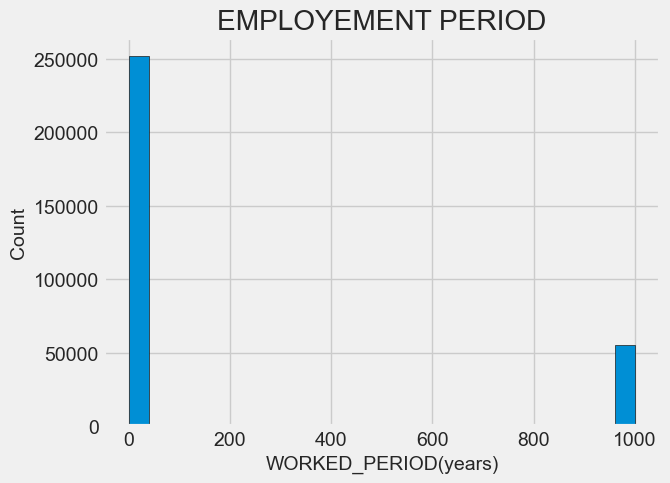

In [389]:
appli_train['DAYS_EMPLOYED'] = abs(appli_train['DAYS_EMPLOYED'])
#appli_train['DAYS_EMPLOYED'].corr(appli_train['TARGET'])


plt.style.use('fivethirtyeight')# Set the style of plots

# Plot the distribution of ages in years
plt.hist(appli_train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('EMPLOYEMENT PERIOD'); plt.xlabel('WORKED_PERIOD(years)'); plt.ylabel('Count')

### Bivariate analysis
We are going to proceed wit a bivariate analysis. This kind of analysis we help us to have a look on how the relevant feature varaite with the taget. We will plot the feature agai the target with the kde. ....


In [10]:
def biv_plot(data,feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

### Variation of the application ages with the target

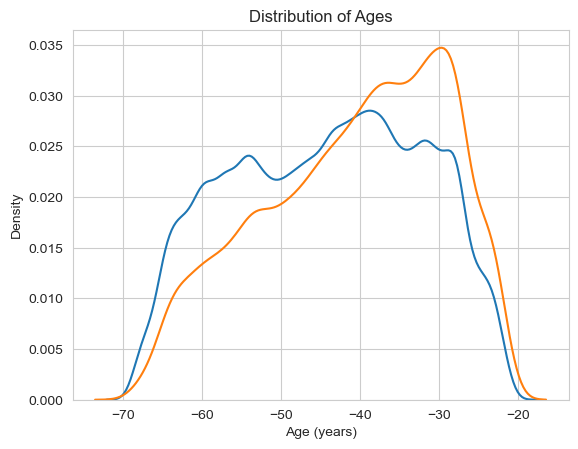

In [387]:
# KDE plot of loans that were repaid on time
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

As the distribution of age does not give any insight in the relationship with the target. A KDE (Kernel Density Plot) is appropriate to have a look on how the age has an effect on the target. And we can see that the red curve which represent the KDE for the target==1 is skew toward the younger clients; suggesting that younger individuals have a higher representation in the dataset where the target equals 1.
Let look at this relationship using age classes.

In [261]:
# Age information into a separate dataframe
age_data = appli_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = appli_train['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
#age_data.head(10)

# Group by the bin and calculate averages
age_classes  = age_data.groupby('YEARS_BINNED').mean()
#age_classes

Text(0.5, 1.0, 'Failure to Repay by Age Group')

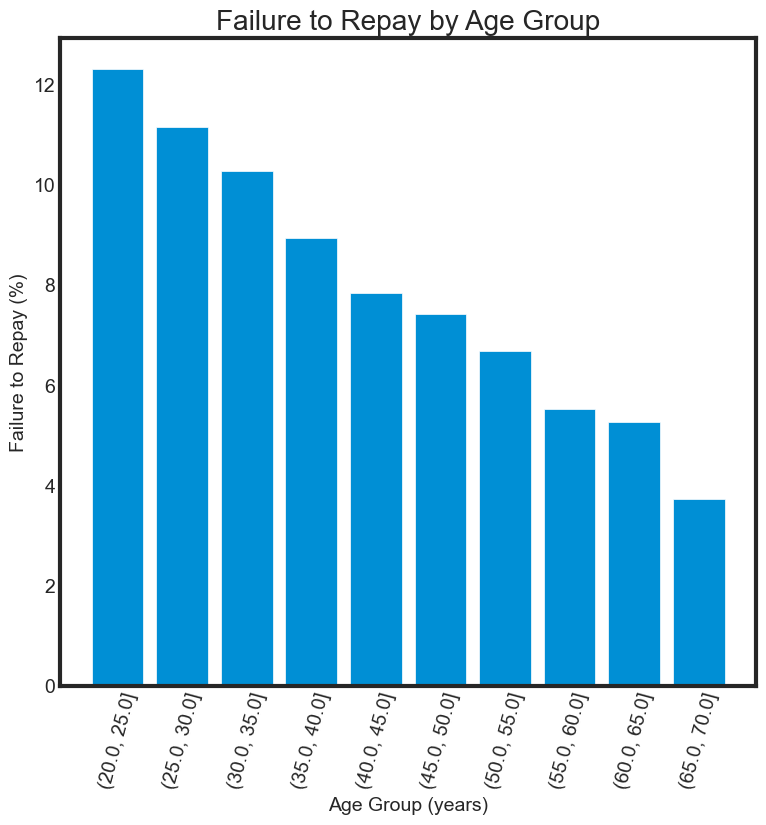

In [263]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_classes.index.astype(str), 100 * age_classes['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

This histogram is much more clean and confirm the trend that younger clients are more likely to not repay the loan

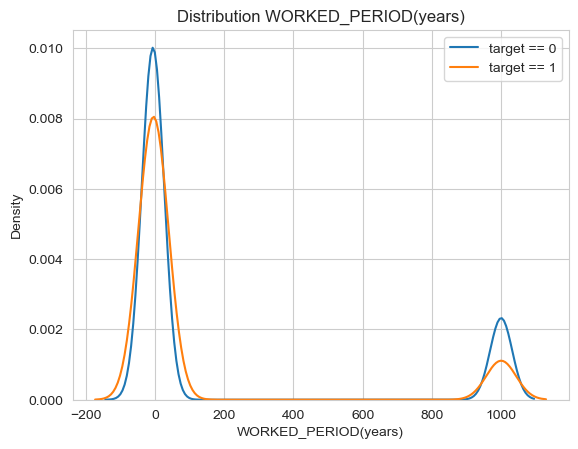

In [385]:
# KDE plot of loans that were repaid on time
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('WORKED_PERIOD(years)'); plt.ylabel('Density'); plt.title('Distribution WORKED_PERIOD(years)')

plt.legend()

This KDE descibe the relationship between the worked period and the target. Unlike the age distribution they is less variability in the data and the KDE for target==1 is skew toward client that have less than 10 years of seniority in their current JOB. This suggest that clients that have less seniority in their Job are more representative when Target==1. They are more likely to default on their loan.

Now let's look at the relationship of the target with the variables that have higher negative correlation. EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 are the features with the strongest negative correlation with the target. These variables represent a "normalized score from the external data source". 

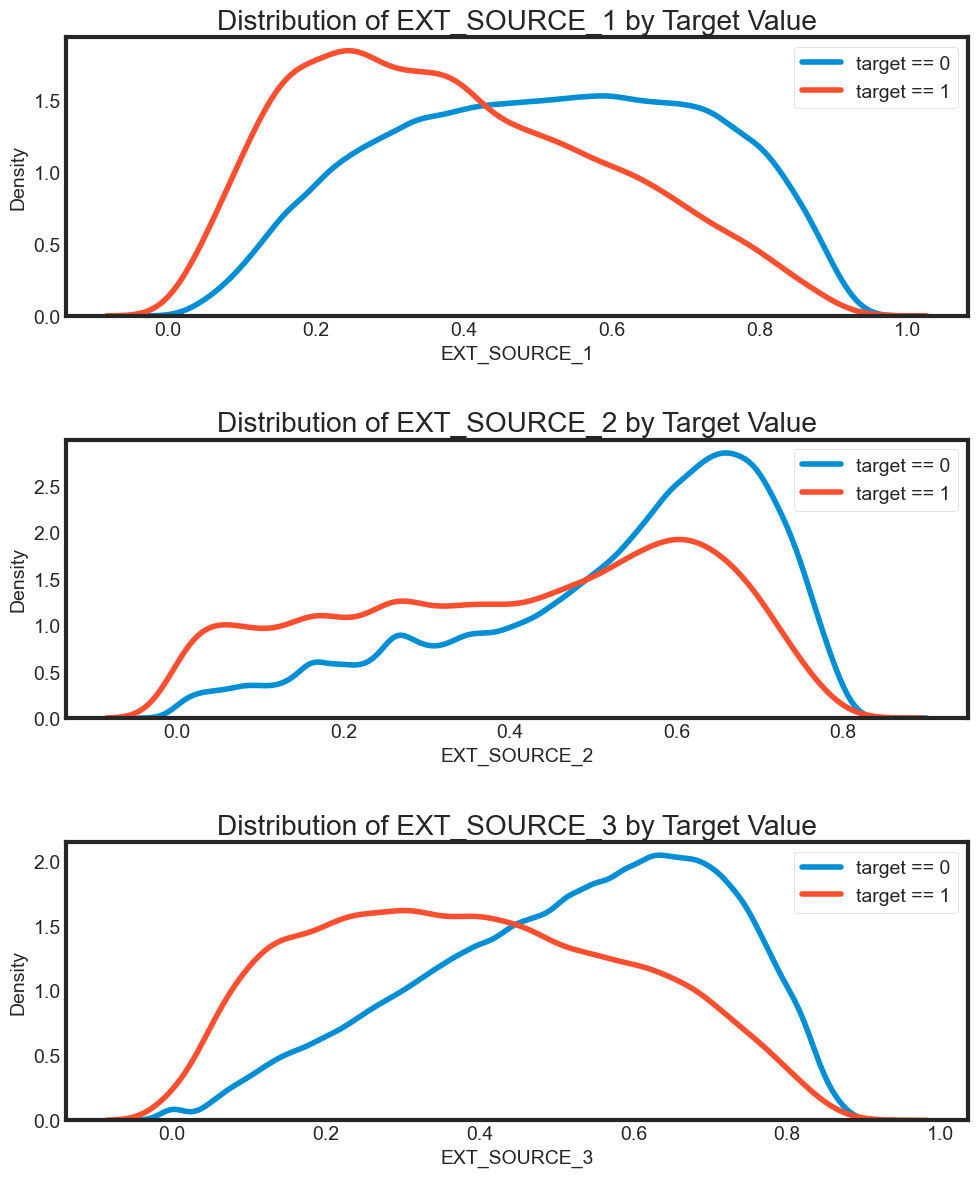

In [269]:
# KDE for the negative correlated features
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1) # i+1 is for the iteration 
    # plot repaid loans
    sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5) # adjust the spacing between subplots to prevent overlapping and ensure a neat layout

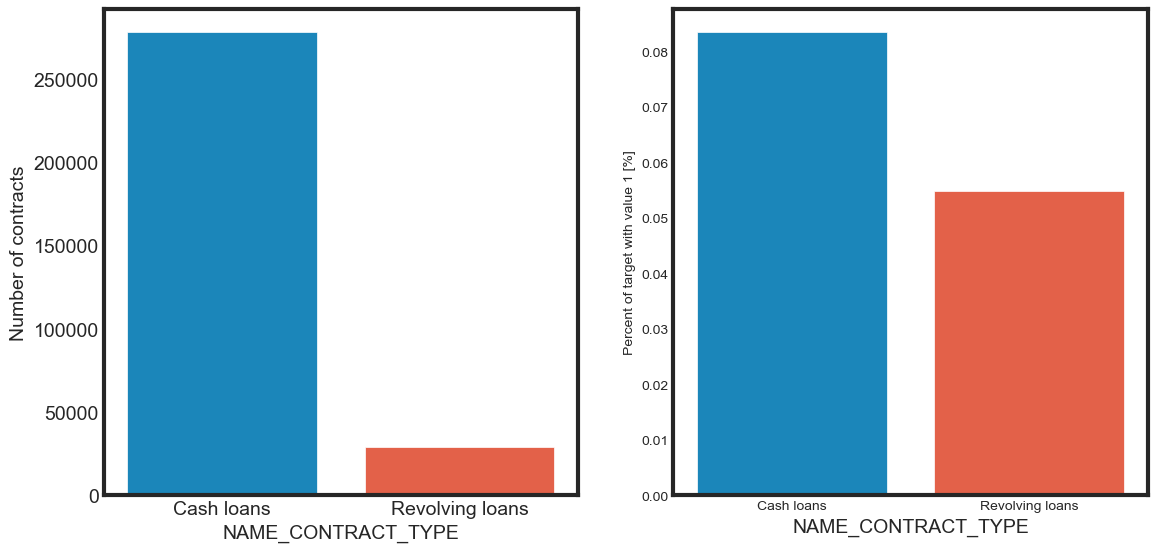

In [286]:
biv_plot(appli_train,'NAME_CONTRACT_TYPE')

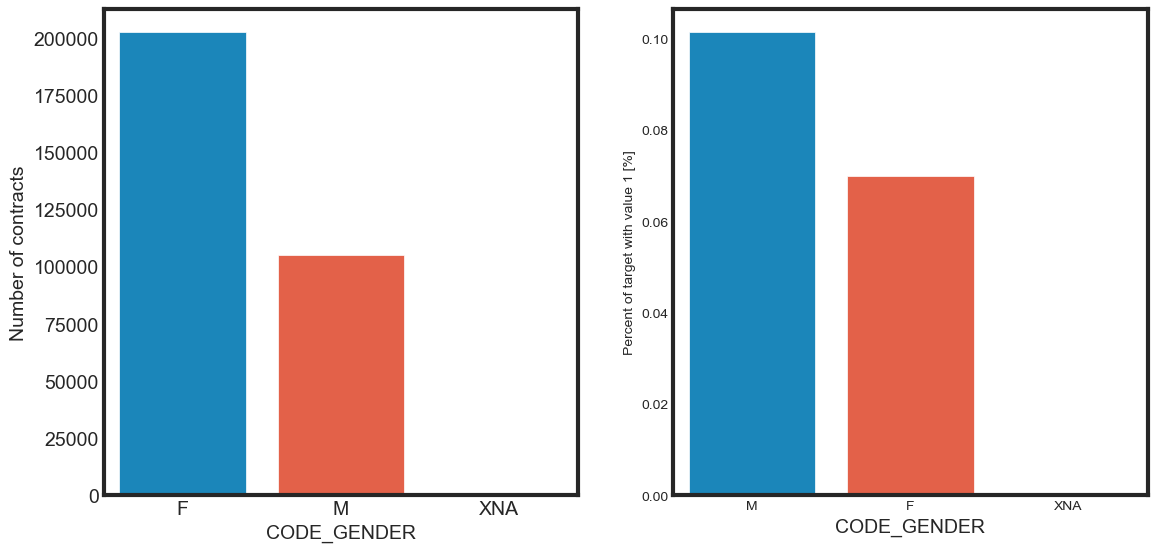

In [288]:
biv_plot(appli_train,'CODE_GENDER')

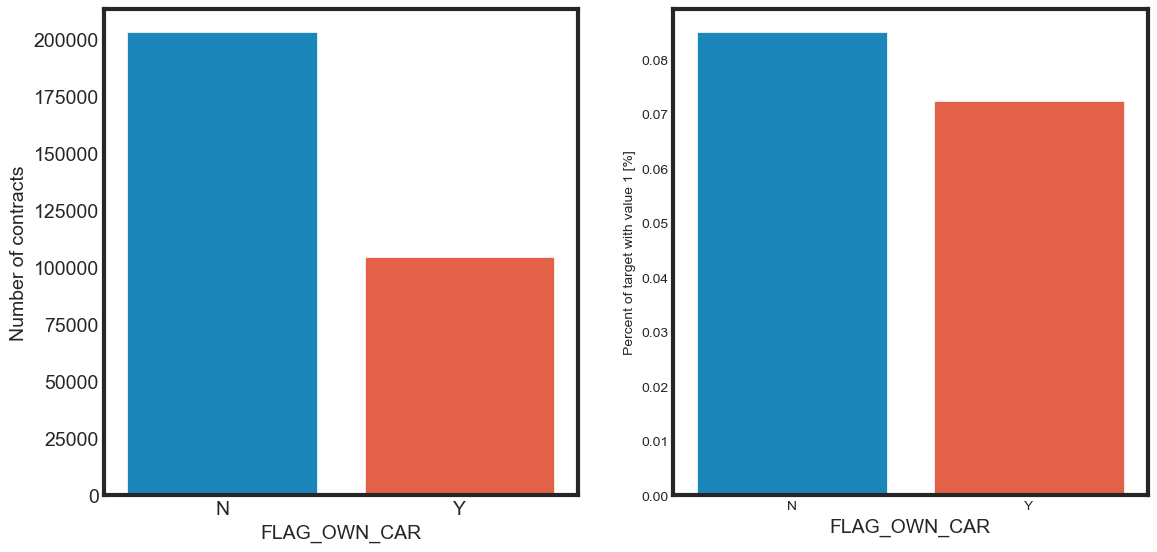

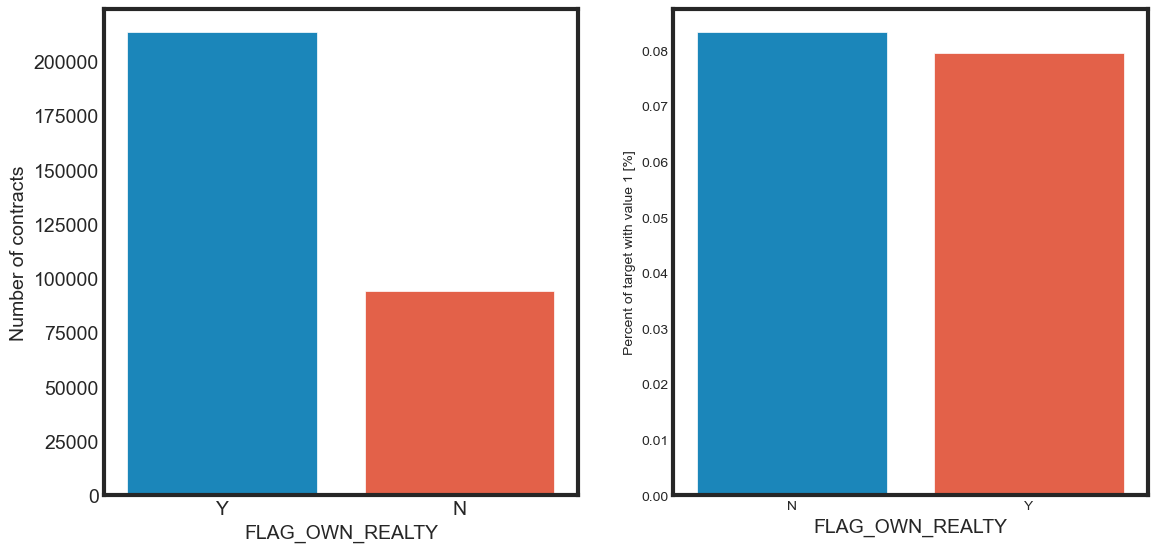

In [290]:
biv_plot(appli_train,'FLAG_OWN_CAR')
biv_plot(appli_train,'FLAG_OWN_REALTY')

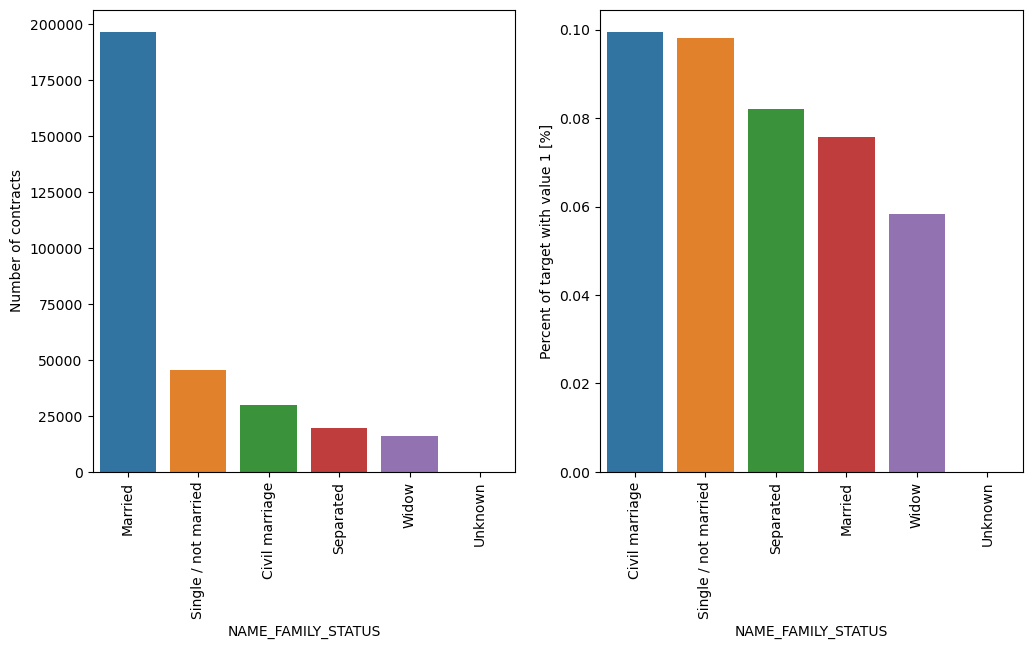

In [14]:
biv_plot(appli_train,'NAME_FAMILY_STATUS',True, True)

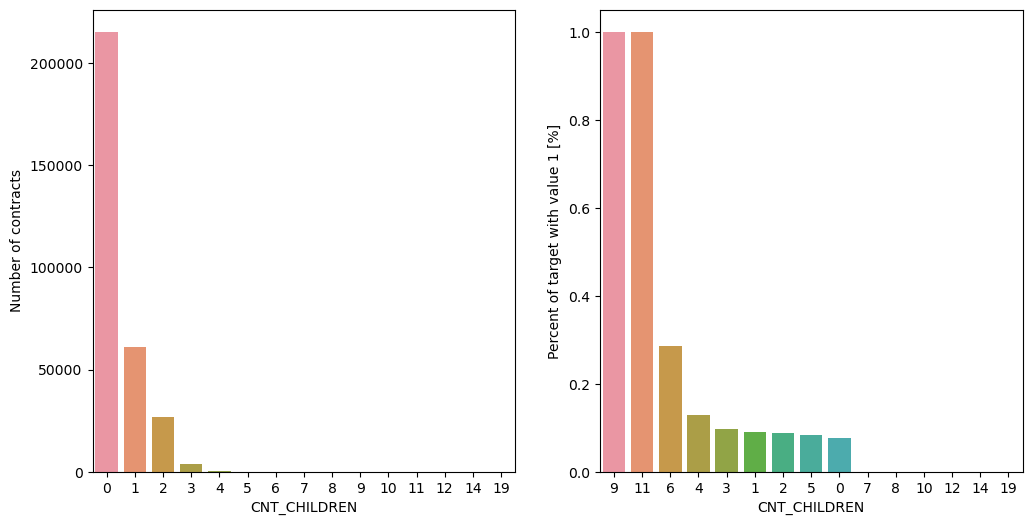

In [16]:
biv_plot(appli_train,'CNT_CHILDREN')

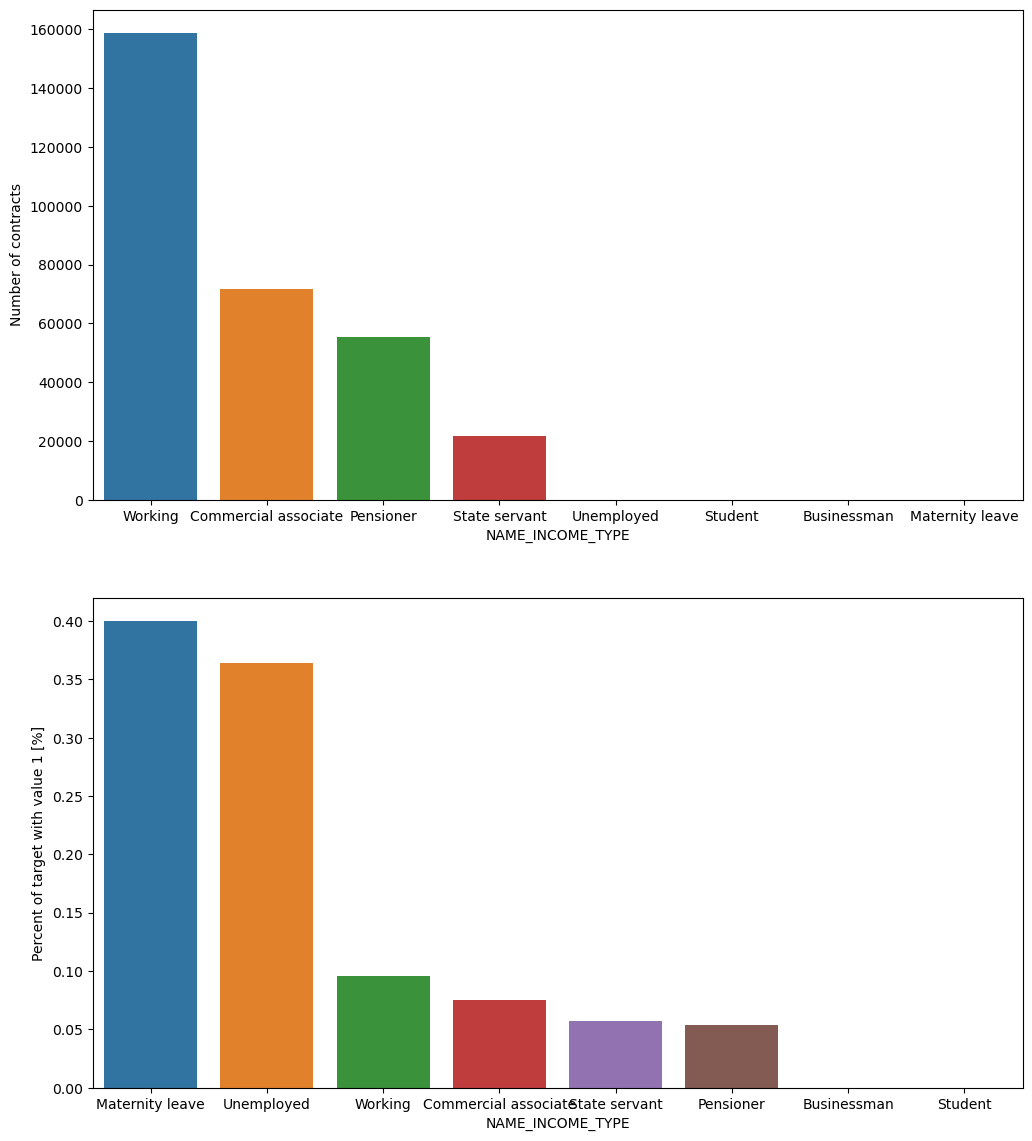

In [18]:
biv_plot(appli_train,'NAME_INCOME_TYPE',False,False)

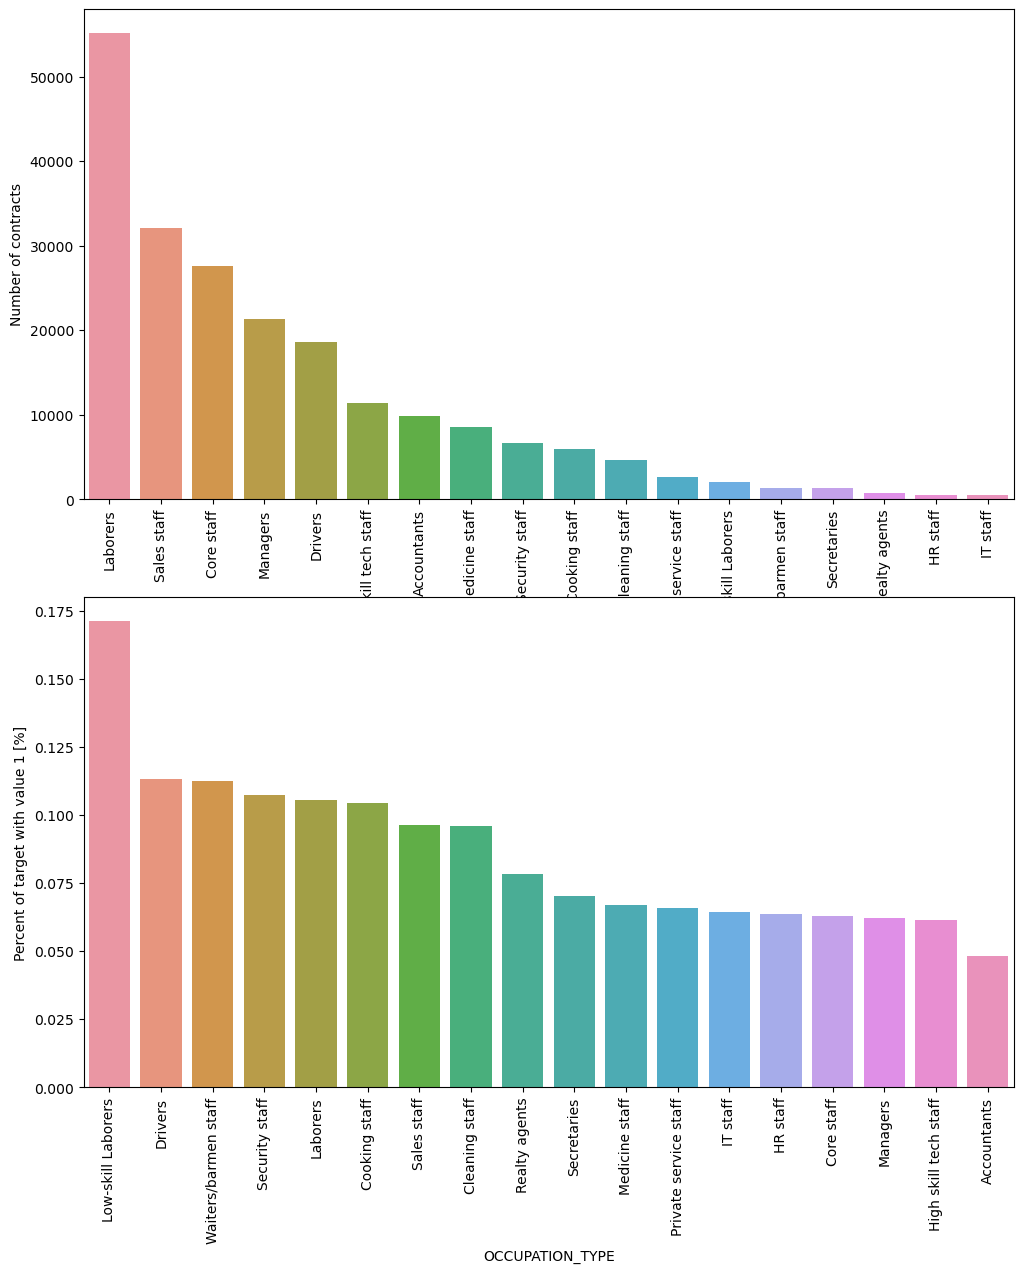

In [20]:
biv_plot(appli_train,'OCCUPATION_TYPE',True, False)

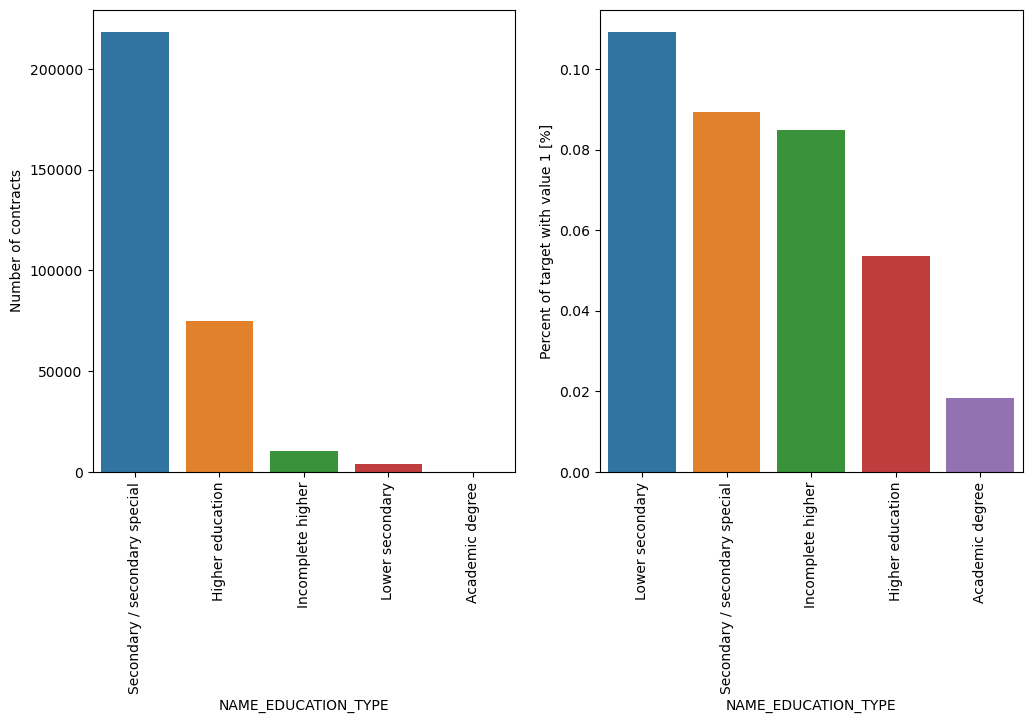

In [22]:
biv_plot(appli_train,'NAME_EDUCATION_TYPE',True)

In [38]:
# Plot distribution of multiple features (for comparison, with TARGET = 1/0 on the same graph
def dist_comp(data,var_list,nrow=2):
    
    i = 0
    t1 = data.loc[data['TARGET'] != 0]
    t0 = data.loc[data['TARGET'] == 0]

   # sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var_list:
        i += 1   #track subplot position
        plt.subplot(nrow,2,i) #select the next plot in the grid with a corret location
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend()
    plt.show();

<Figure size 640x480 with 0 Axes>

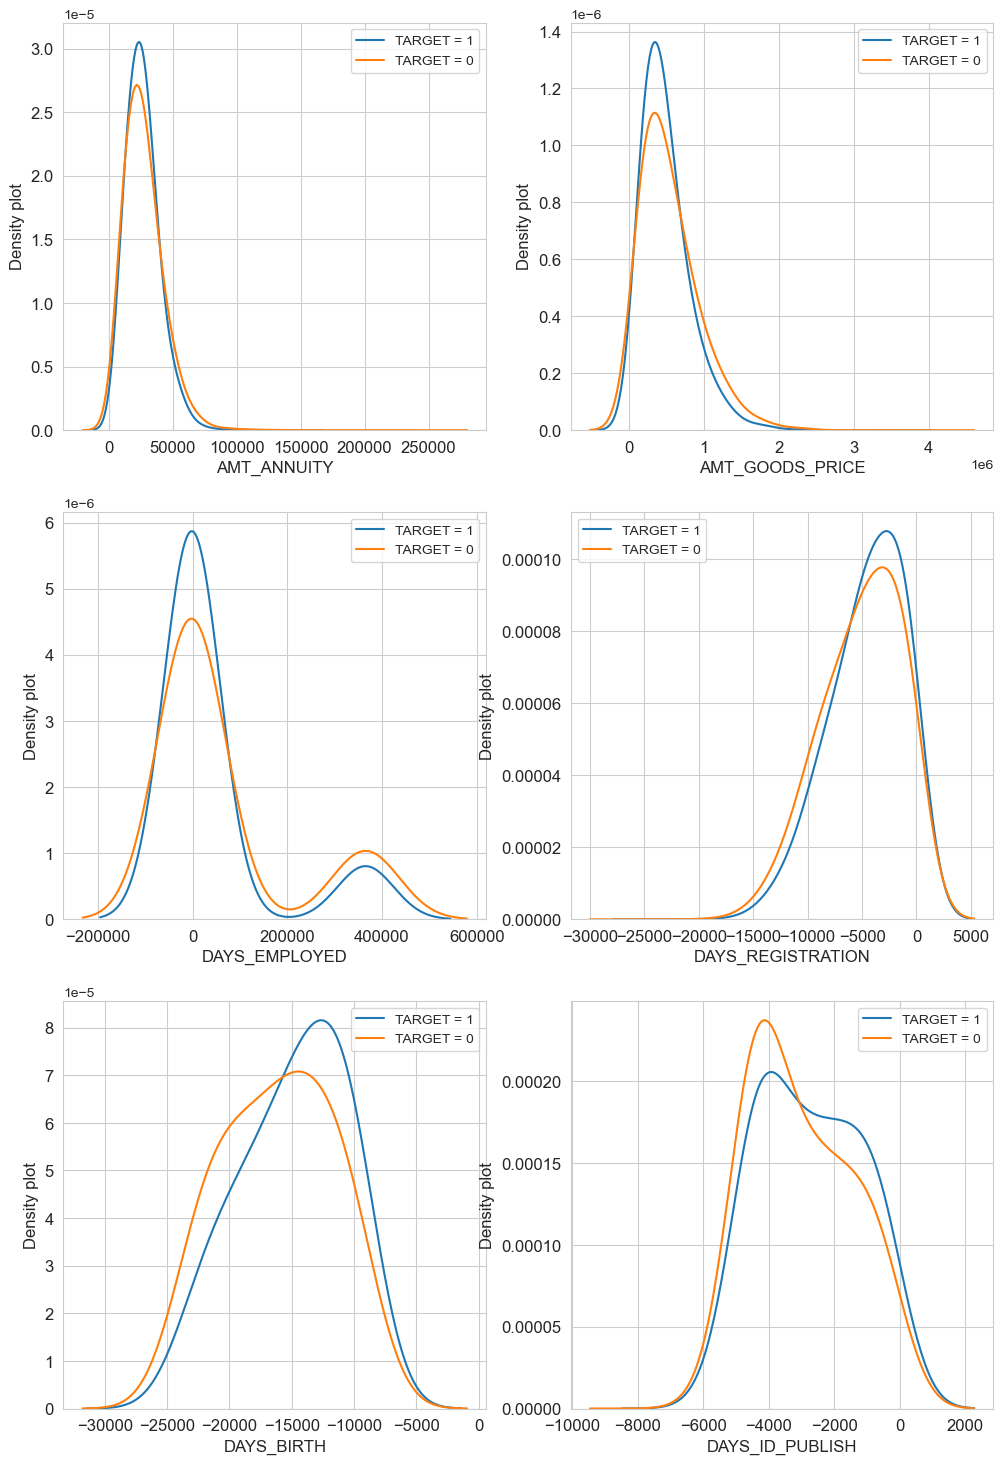

In [40]:
var_list = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
dist_comp(appli_train,var_list,nrow=3)

#### Correlations between features
Let's explore the correlation between features. This analysis provides insights into how different features are related. First, it helps assess feature importance, guiding the selection of relevant features for the modeling step. By examining correlations, we can determine which features to retain or exclude from the model. Secondly, this approach helps mitigate multicollinearity issues, ensuring a more robust model.
#### Encoding categorical variables
There are two main approaches for encoding categorical variables: One-Hot Encoding (OHE) and Label Encoding.

* Label Encoding assigns a unique integer to each category within a variable. However, these numerical values do not inherently reflect any meaningful relationship between the categories.

* One-Hot Encoding creates a new column for each category, where each observation receives a 1 in the column corresponding to its category and 0 in all others.

In this case, we will apply Label Encoding for variables with two categories and One-Hot Encoding for those with more than two categories.

In [188]:
#label encoding using Scikit-Learn LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0
#Initialize encoding dataframe
train_En=appli_train
test_En=appli_test
# Iterate through the columns
for col in appli_train:
    if appli_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(appli_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(appli_train[col])
            # Transform both training and testing data
            train_En[col] = le.transform(appli_train[col])
            test_En[col] = le.transform(appli_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [194]:
test_En

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,False,False,False,False,False,False,True,False,True,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,False,False,False,False,False,False,False,False,False,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,False,False,False,False,False,False,False,False,False,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,False,False,False,False,False,True,False,False,True,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,False,False,False,False,False,False,False,False,False,False
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,False,False,False,False,False,False,False,False,False,False
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,False,False,False,False,False,False,True,False,True,False
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,False,False,False,False,False,True,False,False,True,False


In [51]:
# one-hot encoding of categorical variables in the train dataset
train_En = pd.get_dummies(appli_train)

In [53]:
correlations = train_En.corr()

In [57]:
corr_target = correlations["TARGET"].sort_values()
corr_target 

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
                                          ...   
NAME_INCOME_TYPE_Working                0.057481
REGION_RATING_CLIENT                    0.058899
REGION_RATING_CLIENT_W_CITY             0.060893
DAYS_BIRTH                              0.078239
TARGET                                  1.000000
Name: TARGET, Length: 243, dtype: float64

In [59]:
# Display correlations 
print('Most Positive Correlations:\n', corr_target.tail(15))
print('\nMost Negative Correlations:\n', corr_target.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

"DAYS_BIRTH" has the highest positive correlation with the target, followed by "REGION_RATING_CLIENT_W_CITY." However, since "DAYS_BIRTH" values are stored as negatives (as previously explained), the correlation should actually be interpreted as negative. This means that as clients get older, their likelihood of repaying their loan increases, indicating a negative linear relationship with the target variable.

If we take the absolute values of "DAYS_BIRTH," the correlation would correctly appear as negative, reinforcing this interpretation.

On the other hand, "EXT_SOURCE_1," "EXT_SOURCE_2," and "EXT_SOURCE_3" have the strongest negative correlations with the target. These variables represent credit scores derived from external data sources, independent of the information provided during client registration. Their strong correlation with loan repayment behavior suggests that they are highly relevant features for our analysis.

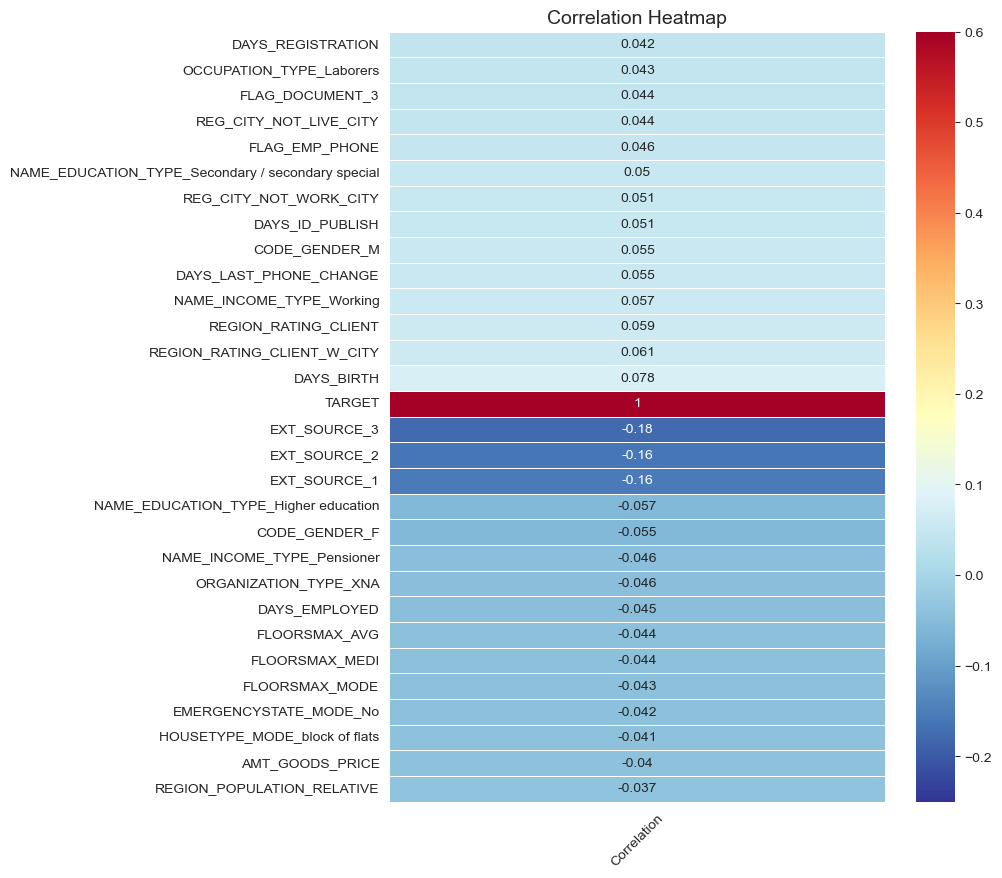

In [70]:
# Select top 15 positive and negative correlations
pos_sub = corr_target.tail(15)  # 15 most negative correlations
neg_sub = corr_target.head(15)  # 15 most positive correlations

# Combine both
sub = pd.concat([pos_sub, neg_sub])

# Convert to DataFrame
sub_df = sub.to_frame(name="Correlation")  # Convert Series to DataFrame

# Heatmap
plt.figure(figsize=(8, 10))  # Adjusted for better visualization
sns.heatmap(sub_df, cmap=plt.cm.RdYlBu_r, vmin=-0.25, vmax=0.6, annot=True, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Let's select 10 of the relevant feature for heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

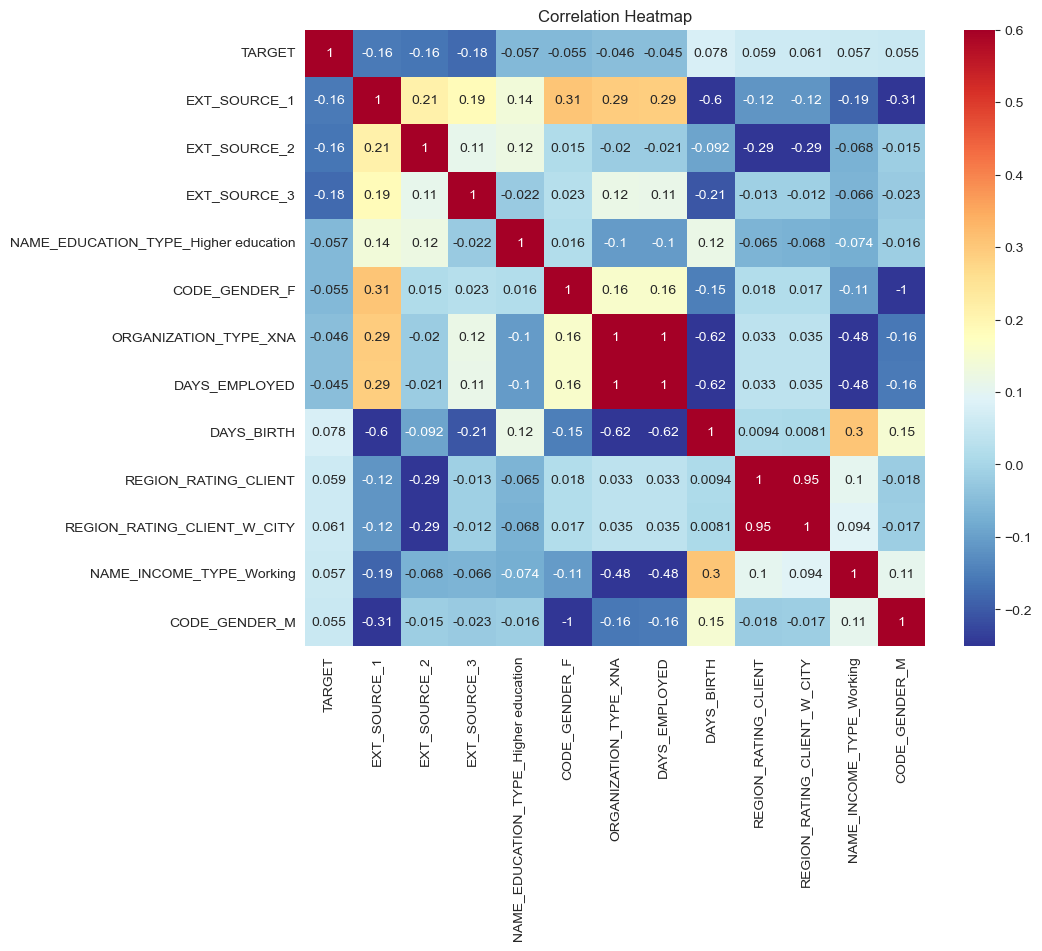

In [82]:
sub_data = train_En[["TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3","NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","ORGANIZATION_TYPE_XNA","DAYS_EMPLOYED","DAYS_BIRTH","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","NAME_INCOME_TYPE_Working","CODE_GENDER_M"]]
sub_data_corrs = sub_data.corr()

# Heatmap of correlations for the features with highest correlation
plt.figure(figsize = (10, 8))

sns.heatmap(sub_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

### Modelling 1
Using the insight we have got from the above analysis, we can fit a model based on the correlated variables we detected in our train data set.
we will use the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [306]:
train_mod_1 = appli_train.copy()
train_mod_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data if it exists
if 'TARGET' in appli_train:
    appli_train = appli_train.drop(columns=['TARGET'])
else:
    appli_train = appli_train.copy()

# Copy of the testing data
#test_In = test_En.copy()

# Align the training and testing data, keep only columns present in both dataframes
train_En, test_En = train_En.align(test_En, join = 'inner', axis = 1)

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Scale each feature to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the imputer on the training data and transform both train and test
appli_train_In = pd.DataFrame(imputer.fit_transform(train_En), columns=train_En.columns)
appli_test_In = pd.DataFrame(imputer.transform(test_En), columns=test_En.columns)

# Fit the scaler on the training data and transform both train and test
appli_train_In = pd.DataFrame(scaler.fit_transform(appli_train_In), columns=appli_train_In.columns)
appli_test_In = pd.DataFrame(scaler.transform(appli_test_In), columns=appli_test_In.columns)

# Print dataset shapes
print('Training data shape:', appli_train_In.shape)
print('Testing data shape:', appli_test_In.shape)

Training data shape: (307511, 108)
Testing data shape: (48744, 108)


In [346]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = appli_train_In.copy()
y = appli_train['TARGET']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Train the Logistic Regression model
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

#  Make predictions
y_pred = log_reg.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9196457606174258
Confusion Matrix:
[[84841     0]
 [ 7413     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



In [238]:
nls = neg_sub.index.tolist()
pls = pos_sub.index.tolist()
r = (np.concatenate((pls,nls))).tolist()

In [ ]:
get_columns = [col for col in r if col in appli_train_In.columns]
train_main = appli_train_In[get_columns]
train_main

In [318]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = appli_train_In[get_columns].copy()
y = appli_train['TARGET']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Train the Logistic Regression model
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)

#  Make predictions
y_pred = log_reg.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9196457606174258
Confusion Matrix:
[[84841     0]
 [ 7413     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



<Axes: >

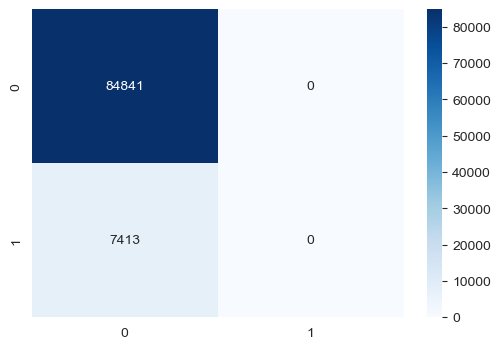

In [314]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

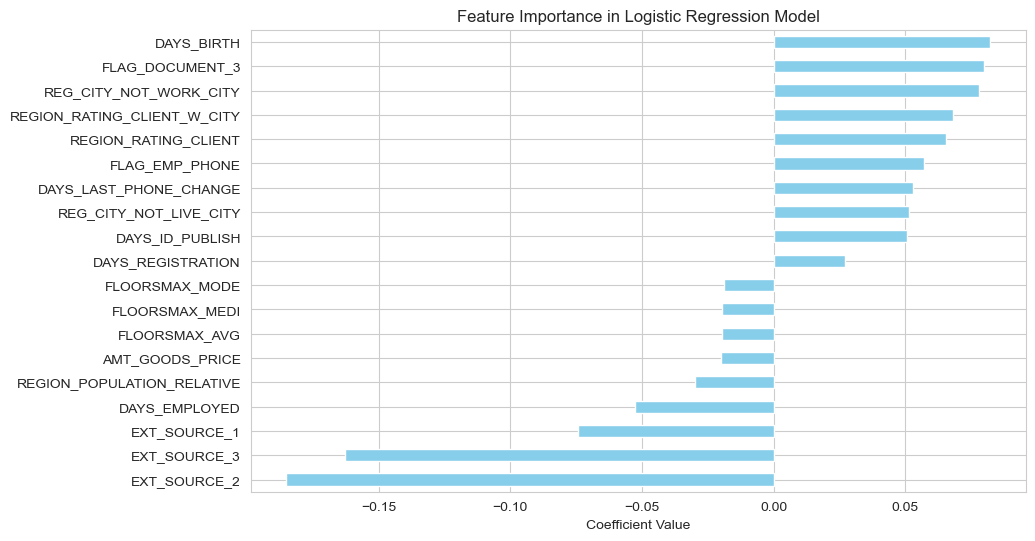

In [321]:
# Feature Importance
# Extract feature importance
importances = pd.Series(log_reg.coef_.ravel(), index=X.columns)  # Flatten and assign feature names

# Sort feature importance values
sorted_importances = importances.sort_values()

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='skyblue')  # Added color for better visualization
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.show()

In [280]:
test_main = appli_test_In[get_columns]
test_main

,DAYS_REGISTRATION,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
0,0.790451,1.0,0.0,1.0,0.0,0.887175,0.594595,0.5,0.5,0.337542,0.177549,0.923573,0.778428,0.040670,0.1250,0.1250,0.1250,0.102132,0.257000
1,0.630431,1.0,0.0,1.0,0.0,0.774489,1.000000,0.5,0.5,0.403890,0.482907,0.341118,0.580538,0.035085,0.1667,0.1667,0.1667,0.034792,0.491595
2,0.911843,0.0,0.0,1.0,0.0,0.513269,0.800559,0.5,0.5,0.292616,0.681715,0.818464,0.518318,0.035114,0.1667,0.1667,0.1667,0.147026,0.260475
3,0.918936,1.0,0.0,1.0,0.0,0.415312,0.579450,0.5,0.5,0.634329,0.683628,0.596114,0.539134,0.041879,0.3750,0.3750,0.3750,0.382716,0.361433
4,0.837873,1.0,0.0,1.0,1.0,0.407809,0.808714,0.5,0.5,0.687091,0.597163,0.497880,0.197840,0.041030,0.1667,0.1667,0.1667,0.145903,0.134897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.631404,0.0,0.0,1.0,0.0,0.527720,0.840634,1.0,1.0,0.296449,0.717489,0.758567,0.518318,0.033258,0.1667,0.1667,0.1667,0.057239,0.024260
48740,0.877797,1.0,0.0,1.0,1.0,0.582743,1.000000,0.5,0.5,0.791601,0.597163,0.800697,0.518318,0.043750,0.1667,0.1667,0.1667,0.113356,0.491595
48741,0.891334,1.0,0.0,1.0,0.0,0.791024,0.804753,0.5,0.5,0.524634,0.316237,0.740082,0.758271,0.038822,0.3333,0.3333,0.3333,0.068462,0.361433
48742,0.940783,1.0,0.0,1.0,1.0,0.810477,0.462255,0.5,0.5,0.634780,0.664367,0.521288,0.378138,0.039621,0.6250,0.6250,0.6250,0.102132,0.257000


In [290]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

xtrain = train_main.copy()
xtest = test_main.copy()

ytrain = appli_train["TARGET"]

# Train on the training data
log_reg.fit(xtrain, ytrain)

log_reg_pred = log_reg.predict_proba(xtest)[:, 1]

In [292]:
log_pred = test_En[['SK_ID_CURR']]
log_pred['TARGET'] = log_reg_pred

log_pred.head()

,SK_ID_CURR,TARGET
0,100001,0.079537
1,100005,0.088251
2,100013,0.067747
3,100028,0.077160
4,100038,0.094890


In [294]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(xtrain, ytrain)

features = list(xtrain.columns)
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'features': features, 'importance': feature_importance_values})

# Make predictions on the test data
rand_reg_pred = random_forest.predict_proba(xtest)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [373]:
feature_importances

,features,importance
0,EXT_SOURCE_1,0.109445
1,EXT_SOURCE_2,0.260647
2,EXT_SOURCE_3,0.169630
3,DAYS_BIRTH,0.238950
4,DAYS_EMPLOYED,0.200481
5,REGION_RATING_CLIENT_W_CITY,0.020847


In [296]:
rand_pred = test_En[['SK_ID_CURR']]
rand_pred['TARGET'] = rand_reg_pred

rand_pred.head()

,SK_ID_CURR,TARGET
0,100001,0.06
1,100005,0.07
2,100013,0.01
3,100028,0.06
4,100038,0.11


In [298]:
import matplotlib.pyplot as plt

def plot_feature_importances(df):
    """
    Plots feature importances from a model.
    
    Args:
        df (DataFrame): A DataFrame containing feature importances.
                        Must have a column named 'features' for feature names 
                        and 'importance' for their corresponding importance scores.
    
    Returns:
        DataFrame: Feature importances sorted from highest to lowest, 
                   including a normalized importance column.
    """

    # Ensure correct column names
    if 'features' not in df.columns or 'importance' not in df.columns:
        raise ValueError("DataFrame must contain 'features' and 'importance' columns.")
    
    # Sort features by importance
    df = df.sort_values('importance', ascending=False).reset_index(drop=True)
    
    # Normalize feature importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Plot the top 15 features
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    top_features = df.head(15)
    ax.barh(top_features['features'], top_features['importance_normalized'], 
            align='center', edgecolor='k')
    
    # Reverse y-axis to have most important features on top
    ax.invert_yaxis()
    
    # Labels and title
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return df


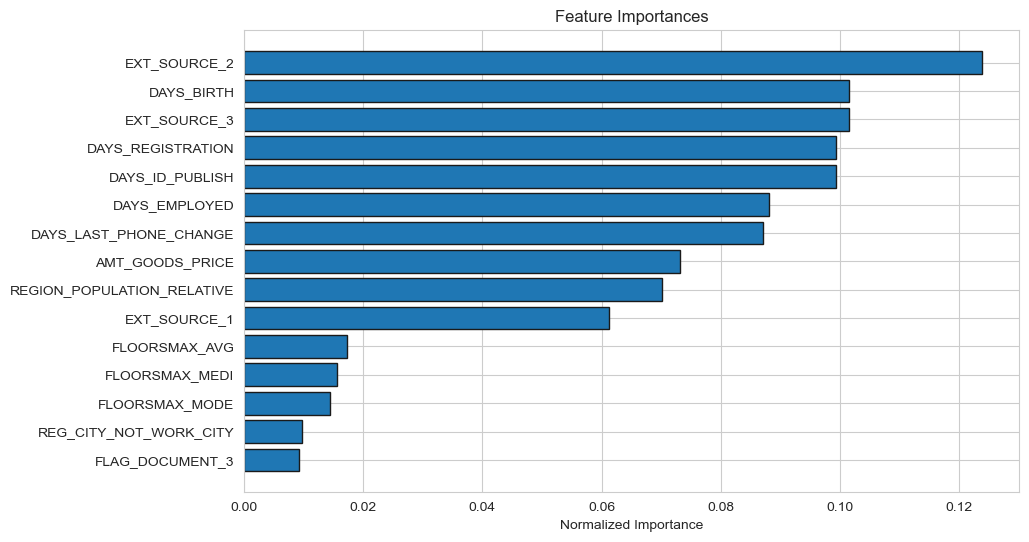

In [300]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [379]:
from sklearn.ensemble import RandomForestClassifier

xtrain_1 = train_In.copy()
xtest_1 = test_In.copy()

# Make the random forest classifier
random_forest_1 = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest_1.fit(xtrain_1, ytrain)

features_1 = list(xtrain_1.columns)
# Extract feature importances
feature_importance_values_1 = random_forest_1.feature_importances_
feature_importances_1 = pd.DataFrame({'features': features_1, 'importance': feature_importance_values_1})

# Make predictions on the test data
rand_reg_pred_1 = random_forest_1.predict_proba(xtest_1)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


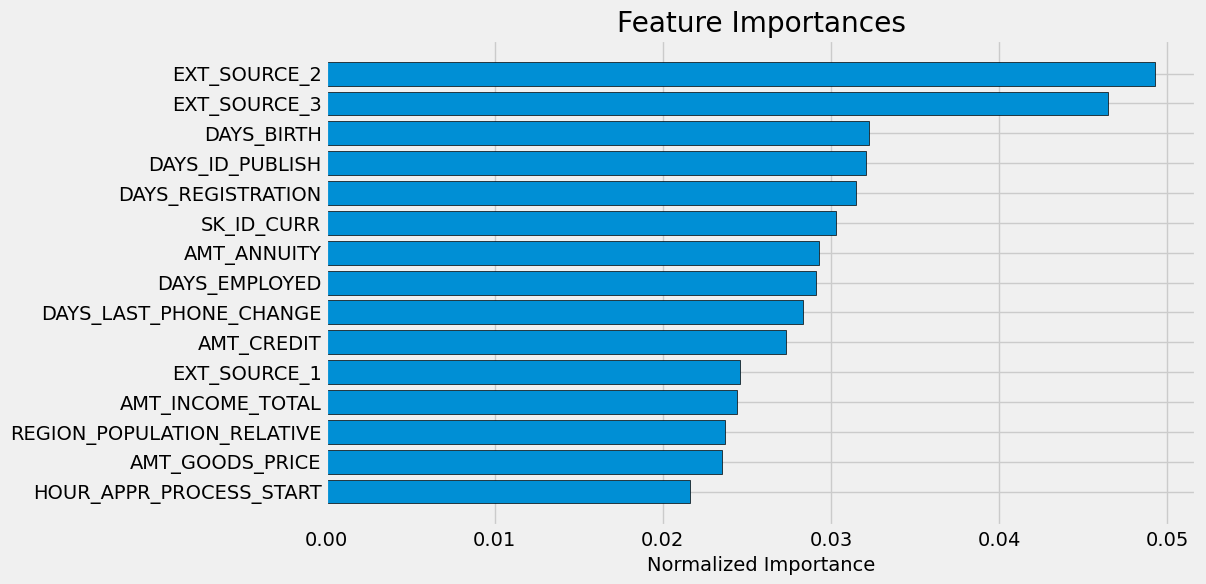

In [381]:
feature_importances_sorted_1 = plot_feature_importances(feature_importances_1)

The importance feature selection graphic above clearly shows ordered imporatance of feature among those has high correlation with the target. "EXT_SOURCE_2", "EXT_SOURCE_3","DAYS_BIRTH" 

Taking into account correlation with the target , we'ven used available dfeattures in the initial dataset from the modeling. We will move then to the remain dataset in order to get more features to improve the models. There are many factor/features we can tused from the bureau, the balance bureau, cash ,, credi datasets. Let's move foward to see what we can get from the others dataset

AUC Score: 0.5000


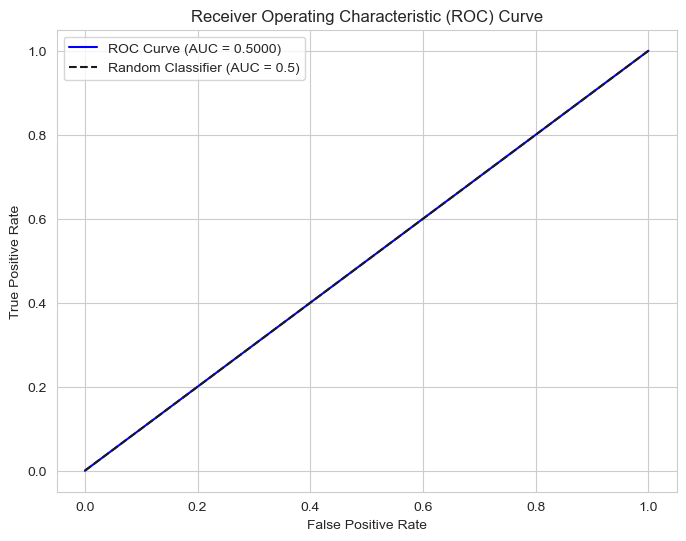

In [342]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')  # Dashed diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

### Features Engenering

As we've mentionned earlier we got several dataset available. We have to go through all the data sources and get additionnal fetaures and insigh for the modeling steps. We are going to build new features or get usefull ones from the data source.

The dataset bureau  contain all information about the clients previous loan. Each row in this dataset represent a single loan. So it's possible that one client had severals loan outstanding before application. Let dive into the data and see what we will get.

In [323]:
#import bureau data
bureau_data = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/bureau.csv")
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [329]:
bureau_data.shape

(1716428, 17)

In [325]:
bureau_data.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

Let's have a look on how numeric features are presented in term of mean, min value , max value and count for each clients regarding previous loan.
We can perform this task with agg function that will compute statistics based on grouped variable.

As mentionned in the description, the bureau dataset contain the informations about previous loans of the clients. It will be relevant to have a look on how many previous loan each clients have before application.
Let's first look at the count of previous loan for each clients

In [350]:
# group by clients ids and make a count
previous_loan = bureau_data.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan'})
previous_loan.head()
#add the count to the original train dataset
appliTrain = appli_train.merge(previous_loan, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
appli_train['previous_loan'] = appliTrain['previous_loan'].fillna(0)
appliTrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


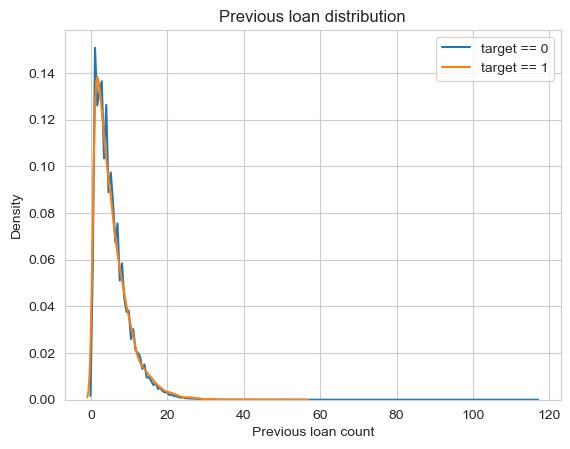

In [352]:
sns.kdeplot(appliTrain.loc[appliTrain['TARGET'] == 0, 'previous_loan'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(appliTrain.loc[appliTrain['TARGET'] == 1, 'previous_loan'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Previous loan count'); plt.ylabel('Density'); plt.title('Previous loan distribution')

plt.legend()

In [239]:
# One-hot-encode for the categorial features in the bureau dataset
bureau_cat = pd.get_dummies(bureau_data.select_dtypes('object'))
bureau_cat['SK_ID_CURR'] = bureau_data['SK_ID_CURR']


Let's define useful fuction that we are going to use in the process

In [333]:
import pandas as pd

def process_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe, grouping by a specified variable.

    Parameters
    --------
        df (DataFrame): The DataFrame to calculate statistics on.
        group_var (str): The variable to group `df` by.
        df_name (str): A prefix for renaming columns to track generated features.

    Returns
    --------
        DataFrame: Aggregated statistics for all numeric columns, grouped by `group_var`.
    """

    # Remove ID columns (except the grouping variable)
    numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != group_var]
    df = df[[group_var] + numeric_cols]

    # Perform aggregation
    agg = df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Create new column names
    new_columns = [group_var]  # First column remains the grouping variable
    for var, stat in agg.columns[1:]:  # Skip the first column (group_var)
        new_columns.append(f'{df_name}_{var}_{stat}')

    # Rename columns
    agg.columns = new_columns

    return agg

In [335]:
import pandas as pd

def process_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each unique category 
    in categorical variables, grouped by `group_var`.

    Parameters
    --------
    df : DataFrame 
        The DataFrame to process categorical variables.
        
    group_var : str
        The variable to group by. Each unique value in this column 
        will correspond to a row in the output.
        
    df_name : str
        Prefix added to column names for clarity.

    Returns
    --------
    categorical : DataFrame
        A DataFrame with counts and normalized counts of each category,
        with one row per unique value of `group_var`.
    """

    # Select categorical columns (excluding the group_var)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # If no categorical columns exist, return an empty DataFrame
    if not cat_cols:
        print("No categorical columns found.")
        return pd.DataFrame()

    # Convert categorical variables into dummy/one-hot encoding
    categorical = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    
    # Ensure the grouping variable is present
    categorical[group_var] = df[group_var]

    # Group by the grouping variable and compute sum (count per category) and mean (normalized count)
    categorical = categorical.groupby(group_var).agg(['sum', 'mean']).reset_index()

    # Generate column names
    new_columns = [group_var]  # Keep the group_var as first column
    for var, stat in categorical.columns[1:]:  # Skip the first column (group_var)
        new_columns.append(f"{df_name}_{var}_{stat}")

    # Rename columns
    categorical.columns = new_columns
    
    return categorical

In [337]:
# Function to calculate correlations with the target for a dataframe
def corr_to_target(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [354]:
#counts for the balance data again
bureau_counts = process_categorical(bureau_data, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,SK_ID_CURR,bureau_SK_ID_BUREAU_sum,bureau_SK_ID_BUREAU_mean,bureau_DAYS_CREDIT_sum,bureau_DAYS_CREDIT_mean,bureau_CREDIT_DAY_OVERDUE_sum,bureau_CREDIT_DAY_OVERDUE_mean,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_ENDDATE_FACT_sum,...,bureau_CREDIT_TYPE_Microloan_sum,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum,bureau_CREDIT_TYPE_Unknown type of loan_mean
0,100001,41276431,5896633.000,-5145,-735.000000,0,0.0,577.0,82.428571,-3302.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,49226177,6153272.125,-6992,-874.000000,0,0.0,-2094.0,-349.000000,-4185.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,23543514,5885878.500,-5603,-1400.750000,0,0.0,-2178.0,-544.500000,-3292.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,13658267,6829133.500,-1734,-867.000000,0,0.0,-977.0,-488.500000,-1065.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,20205603,6735201.000,-572,-190.666667,0,0.0,1318.0,439.333333,-123.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [358]:
bureau_agg = process_numeric(bureau_data.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


## Bureau balance data

In [363]:
#import bureau data
bureau_balance_data = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/bureau_balance.csv")
bureau_balance_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Months of balance that indicate the month of balance relative to application

In [365]:
bureau_balance_counts = process_categorical(bureau_balance_data, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()


,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_STATUS_0_sum,bureau_balance_STATUS_0_mean,bureau_balance_STATUS_1_sum,bureau_balance_STATUS_1_mean,bureau_balance_STATUS_2_sum,bureau_balance_STATUS_2_mean,bureau_balance_STATUS_3_sum,bureau_balance_STATUS_3_mean,bureau_balance_STATUS_4_sum,bureau_balance_STATUS_4_mean,bureau_balance_STATUS_5_sum,bureau_balance_STATUS_5_mean,bureau_balance_STATUS_C_sum,bureau_balance_STATUS_C_mean,bureau_balance_STATUS_X_sum,bureau_balance_STATUS_X_mean
0,5001709,-4656,-48.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
1,5001710,-3403,-41.0,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
2,5001711,-6,-1.5,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
3,5001712,-171,-9.0,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
4,5001713,-231,-10.5,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [367]:
bureau_balance_agg = process_numeric(bureau_balance_data, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [369]:
#Agregatted stats of bureau balance by clients
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau_data[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = process_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

In [371]:
#Insert computed feature into originbal dataset
original_features = list(appli_train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  123


In [481]:
# Merge with the value counts of bureau
train = appli_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = appli_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = appli_train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [441]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,client_bureau_balance_STATUS_X_sum_count,client_bureau_balance_STATUS_X_sum_mean,client_bureau_balance_STATUS_X_sum_max,client_bureau_balance_STATUS_X_sum_min,client_bureau_balance_STATUS_X_sum_sum,client_bureau_balance_STATUS_X_mean_count,client_bureau_balance_STATUS_X_mean_mean,client_bureau_balance_STATUS_X_mean_max,client_bureau_balance_STATUS_X_mean_min,client_bureau_balance_STATUS_X_mean_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


Let's define a function that will help to have the count of the missing values

In [375]:
# counts of missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [493]:
missing_train = missing_values_table(train)
missing_train.head(10)

Your selected dataframe has 247 columns.
There are 192 columns that have missing values.


,Missing Values,% of Total Values
client_bureau_balance_STATUS_C_sum_max,307511,100.0
client_bureau_balance_STATUS_4_mean_mean,307511,100.0
client_bureau_balance_MONTHS_BALANCE_mean_y_min,307511,100.0
client_bureau_balance_MONTHS_BALANCE_mean_y_max,307511,100.0
client_bureau_balance_MONTHS_BALANCE_mean_y_mean,307511,100.0
client_bureau_balance_STATUS_4_mean_min,307511,100.0
client_bureau_balance_MONTHS_BALANCE_sum_y_min,307511,100.0
client_bureau_balance_MONTHS_BALANCE_sum_y_max,307511,100.0
client_bureau_balance_MONTHS_BALANCE_sum_y_mean,307511,100.0
client_bureau_balance_STATUS_5_sum_mean,307511,100.0


In [495]:
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 90])
len(missing_train_vars)

57

Let's perform the analysis on the test dataset

In [399]:
appli_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,F,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,M,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,M,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,F,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,M,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,F,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,0,F,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,0,F,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,0,M,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [479]:
# Merge with the value counts of bureau
test = appli_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test = appli_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of bureau balance
test = appli_test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [403]:
print('Shape of Testing Data: ', test.shape)

Shape of Testing Data:  (48744, 246)


In [483]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bureau_balance_STATUS_X_sum_count,client_bureau_balance_STATUS_X_sum_mean,client_bureau_balance_STATUS_X_sum_max,client_bureau_balance_STATUS_X_sum_min,client_bureau_balance_STATUS_X_sum_sum,client_bureau_balance_STATUS_X_mean_count,client_bureau_balance_STATUS_X_mean_mean,client_bureau_balance_STATUS_X_mean_max,client_bureau_balance_STATUS_X_mean_min,client_bureau_balance_STATUS_X_mean_sum
0,100001,0,F,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,100005,0,M,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
2,100013,0,M,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
3,100028,0,F,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
4,100038,0,M,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,F,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
48740,456222,0,F,0,0,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,0,F,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
48742,456224,0,M,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [485]:
#align dataframe 
train_labels = train['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

In [487]:
print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 247)
Testing Data Shape:  (48744, 246)


In [489]:
missing_test = missing_values_table(test)
missing_test

Your selected dataframe has 246 columns.
There are 189 columns that have missing values.


,Missing Values,% of Total Values
client_bureau_balance_STATUS_3_mean_mean,48744,100.0
client_bureau_balance_STATUS_C_mean_mean,48744,100.0
client_bureau_balance_STATUS_C_sum_mean,48744,100.0
client_bureau_balance_STATUS_C_sum_max,48744,100.0
client_bureau_balance_STATUS_1_mean_max,48744,100.0
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1
DEF_30_CNT_SOCIAL_CIRCLE,29,0.1
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
AMT_ANNUITY,24,0.0


In [491]:
missing_test_vars = list(missing_test.index[missing_test['% of Total Values'] > 90])
len(missing_test_vars)

57

In [475]:
missing_columns = list(set(missing_test_vars + missing_train_vars))
print('There are %d columns with more than 90%% missing in either the training or testing data.' % len(missing_columns))

There are 57 columns with more than 90% missing in either the training or testing data.


In [497]:
# Drop the missing columns
train = train.drop(columns = missing_columns)
test = test.drop(columns = missing_columns)

In [499]:
train.shape

(307511, 190)

In [501]:
test.shape

(48744, 189)

In [505]:
#label encoding using Scikit-Learn LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0
#Initialize encoding dataframe
Enco_train=train
Enco_test=test
# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            Enco_train[col] = le.transform(train[col])
          #  Enco_test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [507]:
Enco_train = pd.get_dummies(Enco_train)

In [523]:
Enco_test = pd.get_dummies(Enco_test)

In [509]:
# Calculate all correlations in dataframe
corrs = Enco_train.corr()

In [511]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
client_bureau_balance_MONTHS_BALANCE_mean_x_mean,0.076424
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_x_mean,0.072606
client_bureau_balance_MONTHS_BALANCE_sum_x_min,0.068072
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
DAYS_LAST_PHONE_CHANGE,0.055218


In [513]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
DAYS_EMPLOYED,-0.047046
client_bureau_balance_MONTHS_BALANCE_count_min,-0.048224
CODE_GENDER_F,-0.054704
NAME_EDUCATION_TYPE_Higher education,-0.056593
client_bureau_balance_MONTHS_BALANCE_count_max,-0.068792
DAYS_BIRTH,-0.078239
client_bureau_balance_MONTHS_BALANCE_count_mean,-0.080193
EXT_SOURCE_1,-0.155317
EXT_SOURCE_2,-0.160472
EXT_SOURCE_3,-0.178919


In [515]:
#correlation between variable 
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [517]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  62


In [525]:
train_corrs_removed = Enco_train.drop(columns = cols_to_remove)
test_corrs_removed = Enco_test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 249)
Testing Corrs Removed Shape:  (48744, 245)


In [527]:
train_corrs_removed.to_csv('train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('test_bureau_corrs_removed.csv', index = False)

In [529]:
train_app = pd.read_csv('train_bureau_corrs_removed.csv')
test_app = pd.read_csv('test_bureau_corrs_removed.csv')

In [ ]:
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

import matplotlib.pyplot as plt

In [534]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [536]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:
submission, fi, metrics = model(train_app, test_app)

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def kde_target(var_name, df):
    # Check if var_name exists in df
    if var_name not in df.columns:
        print(f"Error: '{var_name}' not found in DataFrame.")
        return
    
    # Drop NaN values to avoid errors in kdeplot
    df = df[[var_name, 'TARGET']].dropna()
    
    # Calculate the correlation coefficient between the variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs. not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label='TARGET == 0', shade=True)
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label='TARGET == 1', shade=True)
    
    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title(f'{var_name} Distribution')
    plt.legend()
    
    # Print out the correlation and median values
    print(f'The correlation between {var_name} and TARGET is {corr:.4f}')
    print(f'Median value for loans that were NOT repaid = {avg_not_repaid:.4f}')
    print(f'Median value for loans that WERE repaid = {avg_repaid:.4f}')
    
    plt.show()
